In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)

df=pd.read_csv('emi_data_final.csv')
df

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,total_expenses,expense_to_income_ratio,employment_group,affordability_ratio,credit_risk,employment_stability
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0,59900.0,0.725182,0–2 yrs,0.006053,Medium Risk,Unstable
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0,15400.0,0.716279,6–10 yrs,0.032558,Medium Risk,Stable
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0,35600.0,0.413473,6–10 yrs,0.322590,Medium Risk,Stable
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0,37400.0,0.559880,3–5 yrs,0.242066,Medium Risk,Moderate
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0,58600.0,1.022688,3–5 yrs,0.008726,Low Risk,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400019,27,Male,Married,Graduate,32400,Private,5.0,Large Indian,Rented,10400.0,4,3,2800.0,7000.0,2200.0,4900.0,6100.0,No,0.0,649.0,62000.0,32600.0,Personal Loan EMI,506000.0,47,Not_Eligible,500.0,33400.0,1.030864,3–5 yrs,0.015432,Medium Risk,Moderate
400020,38,Male,Married,Post Graduate,49200,Private,1.9,MNC,Own,0.0,5,4,14000.0,0.0,2600.0,13600.0,8600.0,No,0.0,712.0,142200.0,38100.0,Personal Loan EMI,708000.0,33,Not_Eligible,5200.0,38800.0,0.788618,0–2 yrs,0.105691,Medium Risk,Unstable
400021,32,Male,Single,Graduate,25700,Private,3.2,MNC,Rented,6300.0,1,0,0.0,0.0,2000.0,4600.0,2500.0,No,0.0,676.0,191600.0,39700.0,Home Appliances EMI,93000.0,21,High_Risk,5665.0,15400.0,0.599222,3–5 yrs,0.220428,Medium Risk,Moderate
400022,48,Male,Married,Graduate,47200,Private,3.0,MNC,Own,0.0,4,3,0.0,0.0,7000.0,8900.0,7200.0,No,0.0,784.0,170400.0,45600.0,Home Appliances EMI,144000.0,36,Eligible,14460.0,23100.0,0.489407,3–5 yrs,0.306356,Low Risk,Moderate


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400024 entries, 0 to 400023
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      400024 non-null  int64  
 1   gender                   400024 non-null  object 
 2   marital_status           400024 non-null  object 
 3   education                400024 non-null  object 
 4   monthly_salary           400024 non-null  int64  
 5   employment_type          400024 non-null  object 
 6   years_of_employment      400024 non-null  float64
 7   company_type             400024 non-null  object 
 8   house_type               400024 non-null  object 
 9   monthly_rent             400024 non-null  float64
 10  family_size              400024 non-null  int64  
 11  dependents               400024 non-null  int64  
 12  school_fees              400024 non-null  float64
 13  college_fees             400024 non-null  float64
 14  trav

In [3]:
df['employment_group']=df['employment_group'].astype('category')
df['employment_group'].value_counts()

employment_group
0–2 yrs      149591
3–5 yrs      110792
6–10 yrs      78985
11–20 yrs     45298
20+ yrs       15358
Name: count, dtype: int64

In [4]:
only_numeric_cols=df.select_dtypes(include=['float64','int64']).columns
corr_matrix=df[only_numeric_cols].corr()
corr_matrix

,age,monthly_salary,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,current_emi_amount,credit_score,bank_balance,emergency_fund,requested_amount,requested_tenure,max_monthly_emi,total_expenses,expense_to_income_ratio,affordability_ratio
age,1.000000,-0.000599,0.479541,0.000028,0.209106,0.209106,0.062125,0.037368,-0.001259,-0.001670,-0.000376,-0.001726,0.084807,-0.002117,-0.002033,0.001312,0.000013,-0.000750,0.028093,0.022884,-0.004241
monthly_salary,-0.000599,1.000000,-0.000012,0.207767,-0.000906,-0.000906,-0.003366,-0.001944,0.541445,0.592891,0.510849,0.206449,0.089591,0.423849,0.383472,-0.002109,0.000072,0.378841,0.494872,-0.260671,-0.018641
years_of_employment,0.479541,-0.000012,1.000000,0.000334,0.101620,0.101620,0.030739,0.018572,-0.001344,-0.000327,-0.000443,0.000050,0.154446,-0.002080,-0.000989,0.000989,-0.000690,0.028764,0.014061,0.011127,0.021501
monthly_rent,0.000028,0.207767,0.000334,1.000000,-0.002062,-0.002062,-0.003291,0.000948,0.272887,0.296514,0.253560,0.101178,0.044687,0.208309,0.188177,-0.000816,0.000910,-0.170618,0.628844,0.163208,-0.207054
family_size,0.209106,-0.000906,0.101620,-0.002062,1.000000,1.000000,0.175090,0.107473,-0.001390,-0.001607,-0.000962,-0.001392,0.025974,-0.002142,-0.002578,0.000609,-0.002400,-0.062354,0.080495,0.065117,-0.065941
dependents,0.209106,-0.000906,0.101620,-0.002062,1.000000,1.000000,0.175090,0.107473,-0.001390,-0.001607,-0.000962,-0.001392,0.025974,-0.002142,-0.002578,0.000609,-0.002400,-0.062354,0.080495,0.065117,-0.065941
school_fees,0.062125,-0.003366,0.030739,-0.003291,0.175090,0.175090,1.000000,0.054351,0.000159,-0.000386,0.000156,-0.001786,0.006443,-0.001497,-0.001993,0.001356,0.000067,-0.215283,0.267336,0.226233,-0.223224
college_fees,0.037368,-0.001944,0.018572,0.000948,0.107473,0.107473,0.054351,1.000000,-0.002004,-0.002555,-0.000435,0.000617,0.003867,-0.002764,-0.001957,0.003871,-0.001447,-0.258894,0.373055,0.309709,-0.248060
travel_expenses,-0.001259,0.541445,-0.001344,0.272887,-0.001390,-0.001390,0.000159,-0.002004,1.000000,0.771966,0.666225,0.270298,0.118517,0.551696,0.499187,-0.000428,-0.000348,0.440668,0.696180,-0.079518,0.085307
groceries_utilities,-0.001670,0.592891,-0.000327,0.296514,-0.001607,-0.001607,-0.000386,-0.002555,0.771966,1.000000,0.726849,0.295807,0.129528,0.603591,0.545452,0.000424,0.000098,0.484649,0.759794,-0.088067,0.094492


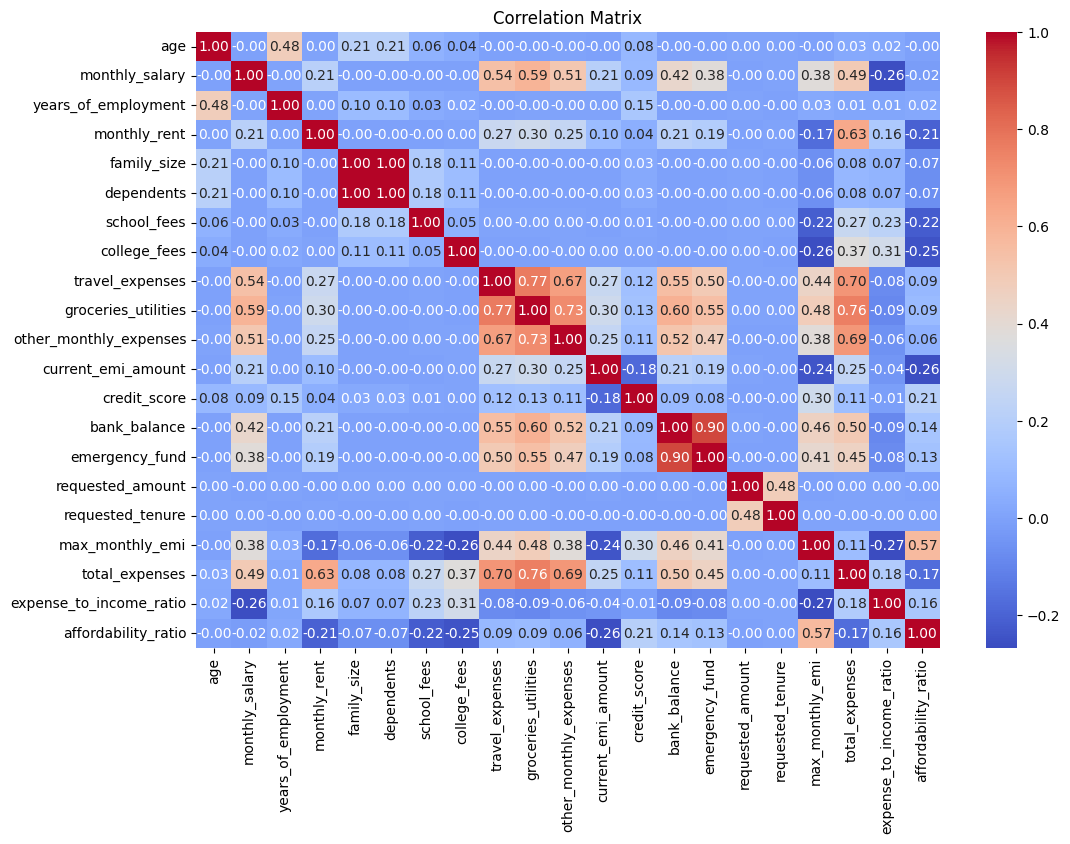

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm') 
plt.title('Correlation Matrix')
plt.show()

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
for col in only_numeric_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1 
    lower=Q1-1.5*IQR 
    upper=Q3+1.5*IQR
    outliers=df[(df[col]<lower) | (df[col]>upper)]
    # print(f'Column: {col}, Number of outliers: {outliers.shape[0]}')
    print(f'{col}: lower={lower}, upper={upper}')
    clean_df=df[(df[col]>=lower) & (df[col]<=upper)]
    


age: lower=8.0, upper=72.0
monthly_salary: lower=-21000.0, upper=129400.0
years_of_employment: lower=-7.8, upper=16.2
monthly_rent: lower=-16050.0, upper=26750.0
family_size: lower=-1.0, upper=7.0
dependents: lower=-2.0, upper=6.0
school_fees: lower=-13500.0, upper=22500.0
college_fees: lower=-9750.0, upper=16250.0
travel_expenses: lower=-3100.0, upper=13700.0
groceries_utilities: lower=-5350.0, upper=29450.0
other_monthly_expenses: lower=-4450.0, upper=17550.0
current_emi_amount: lower=-12000.0, upper=20000.0
credit_score: lower=514.5, upper=886.5
bank_balance: lower=-232650.0, upper=667750.0
emergency_fund: lower=-98800.0, upper=267600.0
requested_amount: lower=-431000.0, upper=1049000.0
requested_tenure: lower=-22.5, upper=77.5
max_monthly_emi: lower=-13435.0, upper=23725.0
total_expenses: lower=-13150.0, upper=89650.0
expense_to_income_ratio: lower=-0.0070145535597221365, upper=1.4277828766225253
affordability_ratio: lower=-0.20720181913411606, upper=0.40231642220358355


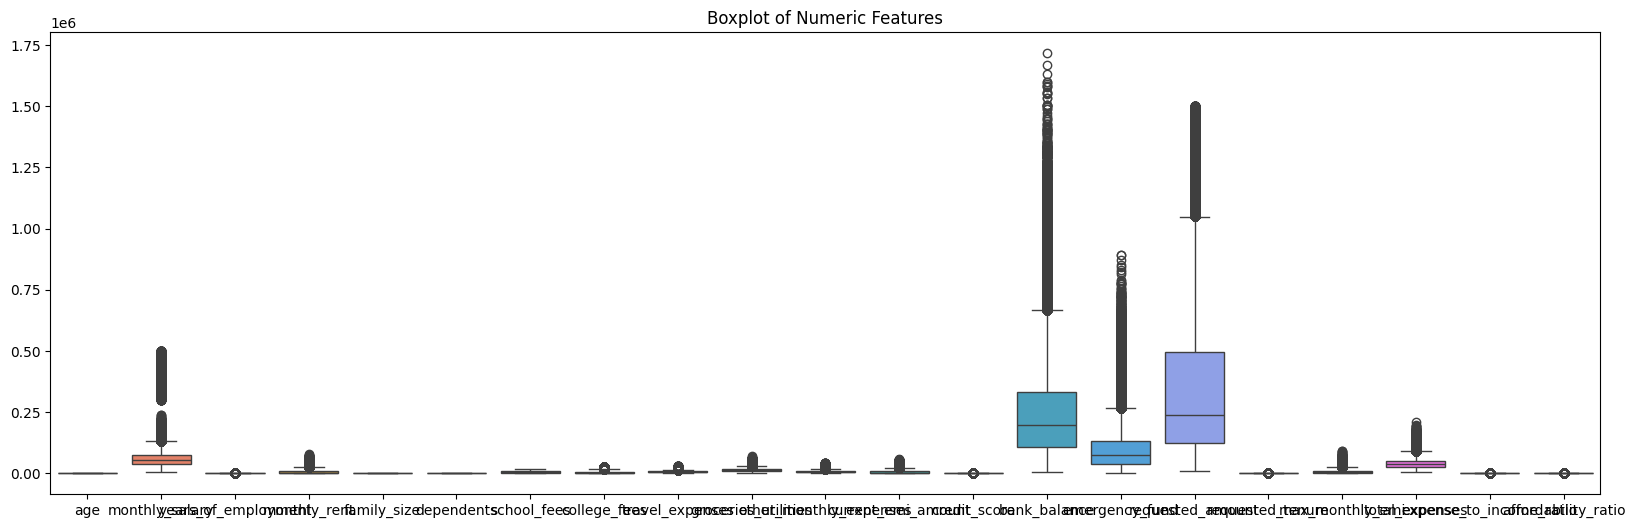

In [8]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df[only_numeric_cols])
plt.title('Boxplot of Numeric Features')
plt.show()

In [9]:
# # Create dynamic subplots to match the number of numeric columns
# num_cols = len(only_numeric_cols)
# if num_cols == 0:
#     print('No numeric columns to plot')
# else:
#     # choose a sensible grid: up to 3 columns per row
#     ncols = min(3, num_cols)
#     nrows = (num_cols + ncols - 1) // ncols
#     fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 4*nrows))
#     # axes may be a single Axes or an array; flatten for easy indexing
#     axes_flat = axes.ravel() if hasattr(axes, 'ravel') else [axes]
#     for i, col in enumerate(only_numeric_cols):
#         sns.boxplot(x=df[col], ax=axes_flat[i])
#         axes_flat[i].set_title(f'Boxplot of {col}')
#     # turn off any unused subplots
#     for j in range(i+1, len(axes_flat)):
#         axes_flat[j].set_visible(False)
#     plt.tight_layout()
#     plt.show()


In [10]:
clean_df

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,total_expenses,expense_to_income_ratio,employment_group,affordability_ratio,credit_risk,employment_stability
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0,59900.0,0.725182,0–2 yrs,0.006053,Medium Risk,Unstable
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0,15400.0,0.716279,6–10 yrs,0.032558,Medium Risk,Stable
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0,35600.0,0.413473,6–10 yrs,0.322590,Medium Risk,Stable
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0,37400.0,0.559880,3–5 yrs,0.242066,Medium Risk,Moderate
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0,58600.0,1.022688,3–5 yrs,0.008726,Low Risk,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400019,27,Male,Married,Graduate,32400,Private,5.0,Large Indian,Rented,10400.0,4,3,2800.0,7000.0,2200.0,4900.0,6100.0,No,0.0,649.0,62000.0,32600.0,Personal Loan EMI,506000.0,47,Not_Eligible,500.0,33400.0,1.030864,3–5 yrs,0.015432,Medium Risk,Moderate
400020,38,Male,Married,Post Graduate,49200,Private,1.9,MNC,Own,0.0,5,4,14000.0,0.0,2600.0,13600.0,8600.0,No,0.0,712.0,142200.0,38100.0,Personal Loan EMI,708000.0,33,Not_Eligible,5200.0,38800.0,0.788618,0–2 yrs,0.105691,Medium Risk,Unstable
400021,32,Male,Single,Graduate,25700,Private,3.2,MNC,Rented,6300.0,1,0,0.0,0.0,2000.0,4600.0,2500.0,No,0.0,676.0,191600.0,39700.0,Home Appliances EMI,93000.0,21,High_Risk,5665.0,15400.0,0.599222,3–5 yrs,0.220428,Medium Risk,Moderate
400022,48,Male,Married,Graduate,47200,Private,3.0,MNC,Own,0.0,4,3,0.0,0.0,7000.0,8900.0,7200.0,No,0.0,784.0,170400.0,45600.0,Home Appliances EMI,144000.0,36,Eligible,14460.0,23100.0,0.489407,3–5 yrs,0.306356,Low Risk,Moderate


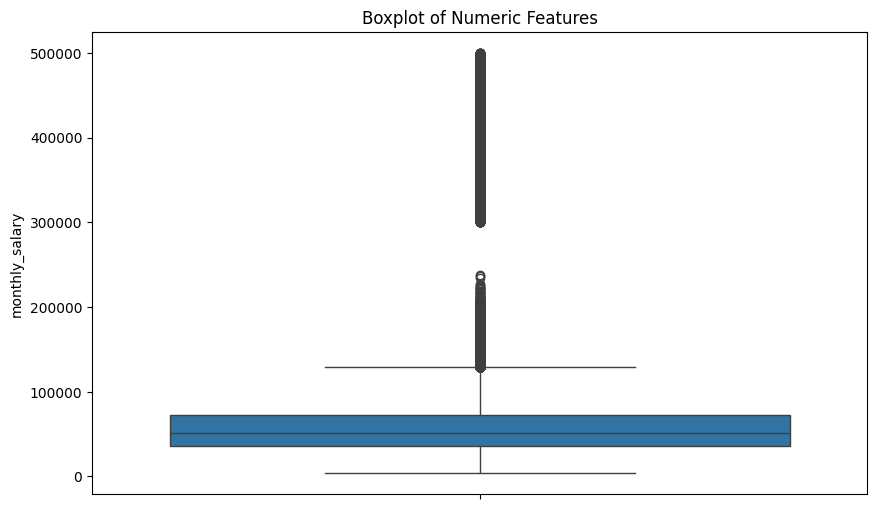

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=clean_df['monthly_salary'])
plt.title('Boxplot of Numeric Features')
plt.show()

In [12]:
for col in only_numeric_cols:
    print(f'{col}: Max: {df[col].max()}, Min: {df[col].min()}')


age: Max: 59, Min: 26
monthly_salary: Max: 499970, Min: 3967
years_of_employment: Max: 36.0, Min: 0.5
monthly_rent: Max: 80000.0, Min: 0.0
family_size: Max: 5, Min: 1
dependents: Max: 4, Min: 0
school_fees: Max: 15000.0, Min: 0.0
college_fees: Max: 25000.0, Min: 0.0
travel_expenses: Max: 30300.0, Min: 600.0
groceries_utilities: Max: 71200.0, Min: 1800.0
other_monthly_expenses: Max: 42900.0, Min: 600.0
current_emi_amount: Max: 56300.0, Min: 0.0
credit_score: Max: 850.0, Min: 407.0
bank_balance: Max: 1717300.0, Min: 6100.0
emergency_fund: Max: 891500.0, Min: 1400.0
requested_amount: Max: 1500000.0, Min: 10000.0
requested_tenure: Max: 84, Min: 3
max_monthly_emi: Max: 91040.4, Min: 500.0
total_expenses: Max: 207500.0, Min: 3400.0
expense_to_income_ratio: Max: 26.776606596395784, Min: 0.0111440728019988
affordability_ratio: Max: 9.205365949891496, Min: 0.0010000600036002


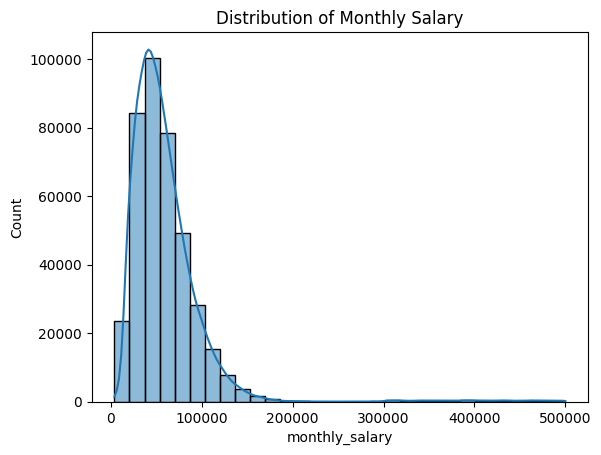

In [13]:
sns.histplot(data=clean_df, x='monthly_salary', bins=30, kde=True)
plt.title('Distribution of Monthly Salary')
plt.show()

In [14]:
# df['monthly_salary'] = np.log1p(df['monthly_salary'])


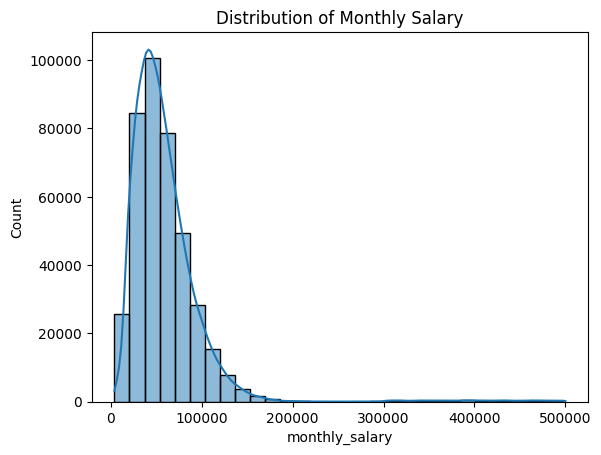

In [15]:
sns.histplot(data=df, x='monthly_salary', bins=30, kde=True)
plt.title('Distribution of Monthly Salary')
plt.show()

In [16]:
# for col in only_numeric_cols:
#     plt.figure(figsize=(8,4))
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Histogram of {col}')
#     plt.show()

In [17]:
# for col in only_numeric_cols:
#     df[col] = np.log1p(df[col])


In [18]:
# for col in only_numeric_cols:
#     plt.figure(figsize=(6,4))
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Histogram of {col}')
#     plt.show()

In [19]:
for col in only_numeric_cols:
    print(f'{col}: Max: {df[col].max()}, Min: {df[col].min()}')

age: Max: 59, Min: 26
monthly_salary: Max: 499970, Min: 3967
years_of_employment: Max: 36.0, Min: 0.5
monthly_rent: Max: 80000.0, Min: 0.0
family_size: Max: 5, Min: 1
dependents: Max: 4, Min: 0
school_fees: Max: 15000.0, Min: 0.0
college_fees: Max: 25000.0, Min: 0.0
travel_expenses: Max: 30300.0, Min: 600.0
groceries_utilities: Max: 71200.0, Min: 1800.0
other_monthly_expenses: Max: 42900.0, Min: 600.0
current_emi_amount: Max: 56300.0, Min: 0.0
credit_score: Max: 850.0, Min: 407.0
bank_balance: Max: 1717300.0, Min: 6100.0
emergency_fund: Max: 891500.0, Min: 1400.0
requested_amount: Max: 1500000.0, Min: 10000.0
requested_tenure: Max: 84, Min: 3
max_monthly_emi: Max: 91040.4, Min: 500.0
total_expenses: Max: 207500.0, Min: 3400.0
expense_to_income_ratio: Max: 26.776606596395784, Min: 0.0111440728019988
affordability_ratio: Max: 9.205365949891496, Min: 0.0010000600036002


In [20]:
outliers

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,total_expenses,expense_to_income_ratio,employment_group,affordability_ratio,credit_risk,employment_stability
12,32,Male,Married,Graduate,11837,Private,1.3,Large Indian,Rented,11700.0,4,3,0.0,0.0,3800.0,14000.0,3400.0,No,0.0,695.0,129600.0,70900.0,E-commerce Shopping EMI,30000.0,12,Eligible,13440.0,32900.0,2.779420,0–2 yrs,1.135423,Medium Risk,Unstable
146,27,Female,Single,Post Graduate,10459,Private,0.5,Small,Own,0.0,2,1,2200.0,0.0,8600.0,17800.0,8700.0,No,0.0,662.0,426100.0,242600.0,Vehicle EMI,1319000.0,59,Not_Eligible,11044.0,37300.0,3.566307,0–2 yrs,1.055933,Medium Risk,Unstable
169,58,Male,Married,High School,5534,Government,3.3,MNC,Family,0.0,5,4,2500.0,0.0,7100.0,14300.0,10100.0,No,0.0,741.0,67600.0,25300.0,Personal Loan EMI,724000.0,55,Not_Eligible,13508.0,34000.0,6.143838,3–5 yrs,2.440911,Medium Risk,Moderate
223,32,Male,Married,High School,5644,Private,5.5,Large Indian,Own,6982.0,4,3,14700.0,19600.0,4400.0,21200.0,4600.0,No,0.0,676.0,292800.0,92400.0,Education EMI,160000.0,30,High_Risk,6800.0,71482.0,12.665131,6–10 yrs,1.204819,Medium Risk,Stable
266,32,Female,Married,Graduate,8317,Self-employed,1.0,Large Indian,Family,0.0,2,1,0.0,0.0,3300.0,5400.0,1400.0,No,0.0,701.0,21200.0,5000.0,Education EMI,193000.0,38,Not_Eligible,5652.0,10100.0,1.214380,0–2 yrs,0.679572,Medium Risk,Unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399345,27,Male,Single,Graduate,9780,Private,0.5,Startup,Own,0.0,2,1,11800.0,0.0,4400.0,6500.0,4800.0,No,0.0,723.0,143800.0,72200.0,Home Appliances EMI,87000.0,35,Eligible,4120.0,27500.0,2.811861,0–2 yrs,0.421268,Medium Risk,Unstable
399394,32,Female,Single,Graduate,101300,Government,3.5,Large Indian,Family,0.0,1,0,0.0,0.0,5600.0,16900.0,7300.0,No,0.0,783.0,686800.0,218800.0,E-commerce Shopping EMI,86000.0,5,Eligible,51909.0,29800.0,0.294176,3–5 yrs,0.512428,Low Risk,Moderate
399667,48,Male,Married,Graduate,6236,Private,19.9,MNC,Family,0.0,3,2,2200.0,0.0,6500.0,16300.0,12100.0,No,0.0,689.0,308400.0,176600.0,Personal Loan EMI,551000.0,36,Not_Eligible,18300.0,37100.0,5.949326,11–20 yrs,2.934573,Medium Risk,Highly Stable
399717,38,Female,Married,Professional,11031,Private,14.1,Startup,Rented,51800.0,4,3,12300.0,0.0,17100.0,29100.0,25700.0,No,0.0,724.0,529500.0,302400.0,Education EMI,323000.0,15,Not_Eligible,8400.0,136000.0,12.328891,11–20 yrs,0.761490,Medium Risk,Highly Stable


In [21]:
Q1=df['bank_balance'].quantile(0.25)
Q3=df['bank_balance'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR    
outliers_bank_balance=df[(df['bank_balance']<lower) | (df['bank_balance']>upper)]
outliers_bank_balance

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,total_expenses,expense_to_income_ratio,employment_group,affordability_ratio,credit_risk,employment_stability
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0,35600.0,0.413473,6–10 yrs,0.322590,Medium Risk,Stable
9,32,Female,Single,Post Graduate,129200,Private,1.9,MNC,Family,0.0,2,1,8100.0,11300.0,11800.0,24100.0,16500.0,Yes,33100.0,681.0,963200.0,519100.0,E-commerce Shopping EMI,81000.0,3,Not_Eligible,9355.5,71800.0,0.555728,0–2 yrs,0.072411,Medium Risk,Unstable
35,38,Male,Married,Post Graduate,148600,Private,16.0,MNC,Rented,28300.0,4,3,2400.0,17400.0,11000.0,22500.0,25300.0,No,0.0,717.0,1138000.0,579000.0,Vehicle EMI,1055000.0,80,Eligible,22935.0,106900.0,0.719381,11–20 yrs,0.154341,Medium Risk,Highly Stable
47,32,Male,Single,Post Graduate,158100,Government,10.0,MNC,Family,0.0,1,0,0.0,0.0,19400.0,36400.0,21700.0,No,0.0,737.0,946000.0,304200.0,Education EMI,137000.0,42,Eligible,44330.0,77500.0,0.490196,6–10 yrs,0.280392,Medium Risk,Stable
50,38,Female,Married,Graduate,103200,Private,3.7,Startup,Family,0.0,2,1,0.0,0.0,8400.0,16700.0,7400.0,No,0.0,670.0,726200.0,248800.0,Personal Loan EMI,892000.0,39,Eligible,38885.0,32500.0,0.314922,3–5 yrs,0.376793,Medium Risk,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399891,38,Male,Married,Post Graduate,175400,Government,10.2,Mid-size,Own,0.0,3,2,11600.0,0.0,18200.0,47800.0,21900.0,Yes,33700.0,698.0,1019200.0,574900.0,Personal Loan EMI,425000.0,38,High_Risk,16247.0,99500.0,0.567275,11–20 yrs,0.092628,Medium Risk,Highly Stable
399896,48,Female,Single,High School,97700,Private,4.7,Mid-size,Rented,22700.0,1,0,0.0,0.0,14100.0,17400.0,6600.0,No,0.0,680.0,736000.0,406600.0,Education EMI,153000.0,22,Eligible,20295.0,60800.0,0.622313,3–5 yrs,0.207728,Medium Risk,Moderate
399909,48,Male,Single,Professional,109700,Private,4.9,MNC,Rented,32200.0,1,0,0.0,0.0,11000.0,17400.0,16400.0,Yes,18000.0,696.0,678600.0,219900.0,Personal Loan EMI,610000.0,14,Not_Eligible,5659.5,77000.0,0.701914,3–5 yrs,0.051591,Medium Risk,Moderate
399949,38,Female,Married,Graduate,109500,Self-employed,0.6,Large Indian,Family,0.0,4,3,12000.0,7500.0,12500.0,28600.0,9000.0,No,0.0,790.0,705700.0,321300.0,Home Appliances EMI,263000.0,8,Not_Eligible,23700.6,69600.0,0.635616,0–2 yrs,0.216444,Low Risk,Unstable


In [22]:
df.shape

(400024, 33)

In [23]:
clean_df.shape

(396528, 33)

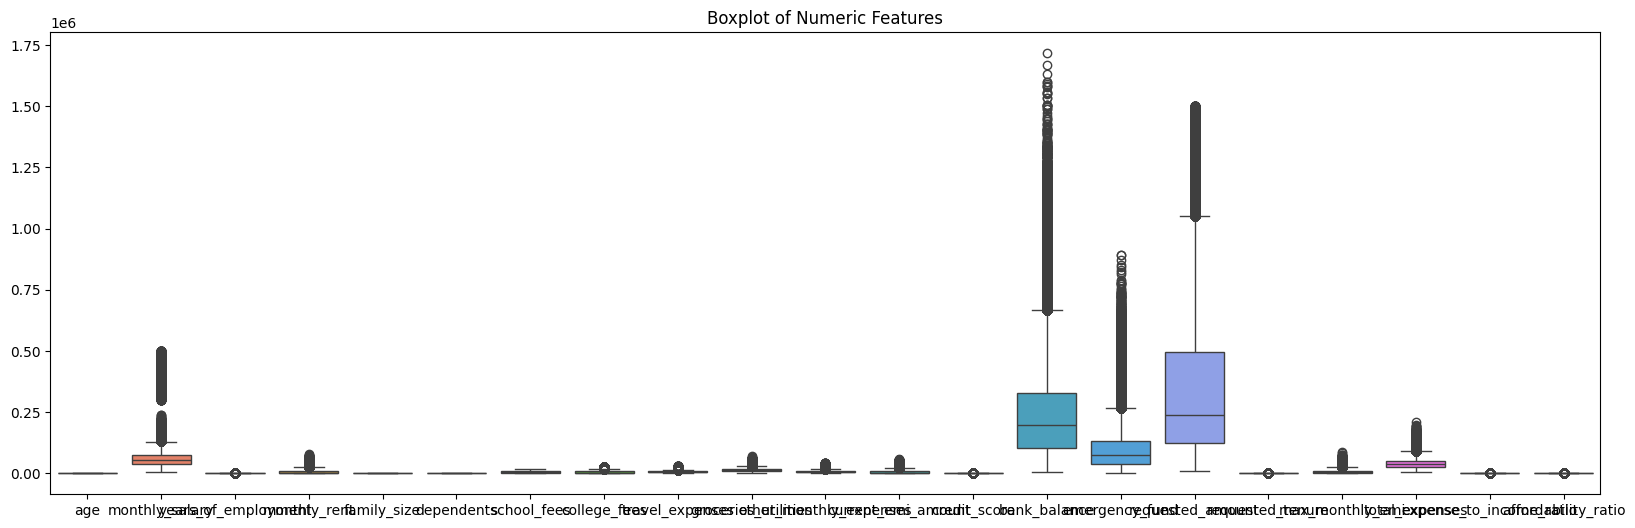

In [24]:
plt.figure(figsize=(20,6))
sns.boxplot(data=clean_df[only_numeric_cols])
plt.title('Boxplot of Numeric Features')
plt.show()

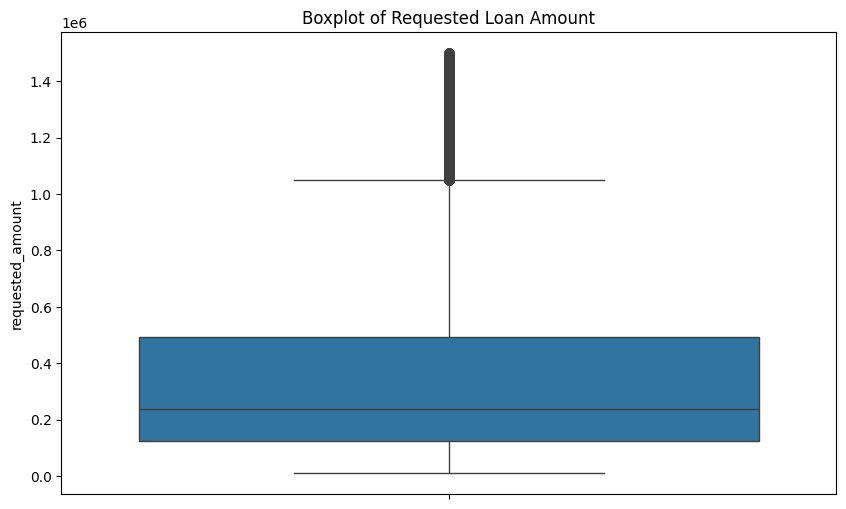

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df['requested_amount'])
plt.title('Boxplot of Requested Loan Amount')
plt.show()

In [26]:
object_cols=df.select_dtypes(include=['object']).columns
for col in object_cols:
    df[col]=df[col].astype('category')


In [27]:
object_cols

Index(['gender', 'marital_status', 'education', 'employment_type',
       'company_type', 'house_type', 'existing_loans', 'emi_scenario',
       'emi_eligibility', 'credit_risk', 'employment_stability'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400024 entries, 0 to 400023
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   age                      400024 non-null  int64   
 1   gender                   400024 non-null  category
 2   marital_status           400024 non-null  category
 3   education                400024 non-null  category
 4   monthly_salary           400024 non-null  int64   
 5   employment_type          400024 non-null  category
 6   years_of_employment      400024 non-null  float64 
 7   company_type             400024 non-null  category
 8   house_type               400024 non-null  category
 9   monthly_rent             400024 non-null  float64 
 10  family_size              400024 non-null  int64   
 11  dependents               400024 non-null  int64   
 12  school_fees              400024 non-null  float64 
 13  college_fees             400024 non-null  fl

In [29]:
category_cols=df.select_dtypes(include=['category']).columns
for col in category_cols:
    print(col)

gender
marital_status
education
employment_type
company_type
house_type
existing_loans
emi_scenario
emi_eligibility
employment_group
credit_risk
employment_stability


In [30]:
df[category_cols]

,gender,marital_status,education,employment_type,company_type,house_type,existing_loans,emi_scenario,emi_eligibility,employment_group,credit_risk,employment_stability
0,Female,Married,Professional,Private,Mid-size,Rented,Yes,Personal Loan EMI,Not_Eligible,0–2 yrs,Medium Risk,Unstable
1,Female,Married,Graduate,Private,MNC,Family,Yes,E-commerce Shopping EMI,Not_Eligible,6–10 yrs,Medium Risk,Stable
2,Male,Married,Professional,Private,Startup,Own,No,Education EMI,Eligible,6–10 yrs,Medium Risk,Stable
3,Female,Married,High School,Private,Mid-size,Own,No,Vehicle EMI,Eligible,3–5 yrs,Medium Risk,Moderate
4,Female,Married,Professional,Private,Mid-size,Family,No,Home Appliances EMI,Not_Eligible,3–5 yrs,Low Risk,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
400019,Male,Married,Graduate,Private,Large Indian,Rented,No,Personal Loan EMI,Not_Eligible,3–5 yrs,Medium Risk,Moderate
400020,Male,Married,Post Graduate,Private,MNC,Own,No,Personal Loan EMI,Not_Eligible,0–2 yrs,Medium Risk,Unstable
400021,Male,Single,Graduate,Private,MNC,Rented,No,Home Appliances EMI,High_Risk,3–5 yrs,Medium Risk,Moderate
400022,Male,Married,Graduate,Private,MNC,Own,No,Home Appliances EMI,Eligible,3–5 yrs,Low Risk,Moderate


In [39]:
# for col in category_cols:
#     # print(f'{col}: {df[col].unique()}')
#     print(f'{col}: {df[col].value_counts()}')

In [32]:
df_encoded = pd.get_dummies(df, columns=category_cols, drop_first=True)


In [33]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,total_expenses,expense_to_income_ratio,employment_group,affordability_ratio,credit_risk,employment_stability
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0,59900.0,0.725182,0–2 yrs,0.006053,Medium Risk,Unstable
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0,15400.0,0.716279,6–10 yrs,0.032558,Medium Risk,Stable
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0,35600.0,0.413473,6–10 yrs,0.322590,Medium Risk,Stable
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0,37400.0,0.559880,3–5 yrs,0.242066,Medium Risk,Moderate
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0,58600.0,1.022688,3–5 yrs,0.008726,Low Risk,Moderate


In [34]:
df.shape

(400024, 33)

In [35]:
df_encoded.shape

(400024, 51)

In [36]:
df_encoded.columns

Index(['age', 'monthly_salary', 'years_of_employment', 'monthly_rent',
       'family_size', 'dependents', 'school_fees', 'college_fees',
       'travel_expenses', 'groceries_utilities', 'other_monthly_expenses',
       'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund',
       'requested_amount', 'requested_tenure', 'max_monthly_emi',
       'total_expenses', 'expense_to_income_ratio', 'affordability_ratio',
       'gender_Male', 'marital_status_Single', 'education_High School',
       'education_Post Graduate', 'education_Professional',
       'education_Unknown', 'employment_type_Private',
       'employment_type_Self-employed', 'company_type_MNC',
       'company_type_Mid-size', 'company_type_Small', 'company_type_Startup',
       'house_type_Own', 'house_type_Rented', 'existing_loans_Yes',
       'emi_scenario_Education EMI', 'emi_scenario_Home Appliances EMI',
       'emi_scenario_Personal Loan EMI', 'emi_scenario_Vehicle EMI',
       'emi_eligibility_High_Ris

In [37]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi', 'total_expenses', 'expense_to_income_ratio',
       'employment_group', 'affordability_ratio', 'credit_risk',
       'employment_stability'],
      dtype='object')

In [38]:
df['emi_scenario'].unique()

['Personal Loan EMI', 'E-commerce Shopping EMI', 'Education EMI', 'Vehicle EMI', 'Home Appliances EMI']
Categories (5, object): ['E-commerce Shopping EMI', 'Education EMI', 'Home Appliances EMI', 'Personal Loan EMI', 'Vehicle EMI']

## Model Training starts Here 

Feature Scaling

In [41]:
# !pip3 install scikit-learn

In [ ]:
# from sklearn.preprocessing import StandardScaler 
# scaler=StandardScaler()
# scaled=scaler.fit_transform(df_encoded) 

# Data set splitting

In [ ]:
# from sklearn.model_selection import train_test_split 
# X = df_encoded.drop(columns=['emi_eligibility_High_Risk', 'emi_eligibility_Not_Eligible'])
# y = df_encoded[['emi_eligibility_High_Risk', 'emi_eligibility_Not_Eligible']]

# def convert_to_label(row):
#     if row['emi_eligibility_High_Risk'] == 1:
#         return 'High Risk'
#     elif row['emi_eligibility_Not_Eligible'] == 1:
#         return 'Not Eligible'
#     else:
#         return 'Eligible'
# y_labels=y.apply(convert_to_label,axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)
# print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

(80005, 49) (80005,) (320019, 49) (320019,)


## Model Training

In [ ]:
# from sklearn.linear_model import LogisticRegression 
# from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score,roc_auc_score

# logreg = LogisticRegression(max_iter=2000, multi_class='multinomial', solver='lbfgs')
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test) 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred, average='weighted'))
# print("Recall:", recall_score(y_test, y_pred, average='weighted'))
# print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
# print("ROC AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovr'))

Accuracy: 0.8820073745390913
Precision: 0.8508330501931187
Recall: 0.8820073745390913
F1 Score: 0.8626243690093157
ROC AUC Score: 0.9192831406504096


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(
#     n_estimators=200,      # number of trees
#     max_depth=None,        # let trees grow fully
#     random_state=42
# )

# # Train model
# rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# y_pred = rf_model.predict(X_test)
# y_prob = rf_model.predict_proba(X_test)  # needed for ROC-AUC


In [ ]:
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred, average='weighted'))
# print("Recall:", recall_score(y_test, y_pred, average='weighted'))
# print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
# print("ROC AUC Score:", roc_auc_score(y_test, y_prob, multi_class='ovr'))


Accuracy: 0.9501531154302856
Precision: 0.9472470196774222
Recall: 0.9501531154302856
F1 Score: 0.9318662747972865
ROC AUC Score: 0.9850656526684226
